In [2]:
import cv2 as cv 
import numpy as np


#  each pixel contains 8 bits i.e 0 to 255 for all 3 channels RGB 
img = cv.imread('hazard10.jpg',1)   # as it is 
#img1 = cv.imread('hazard10.jpg',0) # gray
#img2 = cv.imread('hazard10.jpg',-1) 
cv.imshow('image',img)
#cv.imshow('image1',img1)
#cv.imshow('image2',img2)

print('shape size and data type of image \n',img.shape,img.size,img.dtype)


px = img[100,100]  # accessing the pixel at 100 100
blue = img[100,100,0] #accessing only blue colour as [B,G,R]
print('accessing the pixel at 100 100',px,blue)

img[100,100] = [255,255,255] # making that pixel white 


key = cv.waitKey(0)

if key ==27:
    cv.destroyAllWindows()
elif key == ord('s'):
    cv.imwrite('grayhazard1.jpg',img1)
    cv.destroyAllWindows()

shape size and data type of image 
 (427, 640, 3) 819840 uint8
accessing the pixel at 100 100 [94 63 42] 94


In [3]:
#create black image 
img = np.zeros((512,512,3),np.uint8)

# Draw a diagonal blue line with thickness of 5px by giving 2 end points 
cv.line(img,(0,0),(512,512),(255,0,0),5)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.circle(img,(255,255),50,(0,0,255),-1) #center and radius given  -1 fills the cicle 
pts = np.array([[100,50],[200,300],[300,65],[54,60]],np.int32)
cv.polylines(img,[pts],True,(0,255,255),3)

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,"opencv basics",(0,482),font,2,(255,255,255),5)

cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# opencv by default reads the image in BGR format

img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('image',img_gray)

img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('image',img_hsv)
print('shape size and data type of image \n',img_hsv.shape,img_hsv.size,img_hsv.dtype)
cv.waitKey(0)
cv.destroyAllWindows()

shape size and data type of image 
 (512, 512, 3) 786432 uint8


In [8]:
img = cv.imread('hazard10.jpg',1)

cv.imshow('image',img)

b,g,r = cv.split(img)  # split image into individual color channel 

cv.imshow('blue',b)

cv.imshow('green',g)
cv.imshow('red',r)

img_merge = cv.merge([b,g,r])
cv.imshow("image merge",img_merge)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:

img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('image',img_hsv)

h,s,v = cv.split(img_hsv) 

cv.imshow('hue',h)
cv.imshow('saturation',s)
cv.imshow('value',v)

img = cv.merge([h,s,v])
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
from matplotlib import pyplot as plt
# default image format of matplotlib is RGB


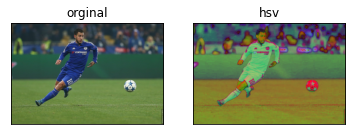

In [4]:
img = cv.imread('hazard10.jpg',1)
cv.imshow('BGR',img) # displaying as a image 

img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('image',img_hsv)
img_hsv_rgb = cv.cvtColor(img_hsv,cv.COLOR_BGR2RGB)

titles = ['orginal','hsv']
images = [img_rgb,img_hsv_rgb]
plt.axis("off")
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i]) # draws the image on plot
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
# use the matplotlib to find the pixel range of the ball 
img = cv.imread('hazard10.jpg')
#cv.imshow('BGR',img) # displaying as a image 

img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

'''
plt.axis('on')
plt.imshow(img_rgb)
plt.show()
'''

ball = img[235:295,465:530]

# convert ball region to white 

##ball=[255,255,255]
##img[235:295,465:530] = ball

img[235:295,365:430] = ball

cv.imshow('BGR',img)


cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
# video operations 

cam = cv.VideoCapture(0)

while(True):
    #capture frame by frame 
    ret,frame = cam.read()
    
    # Display the resulting frame 
    cv.imshow('frame',frame)
    key = cv.waitKey(10)

    if key ==27:
        break
cam.release()
cv.destroyAllWindows()

In [18]:
 # to read a video file 

vid = cv.VideoCapture('vtest.avi')

while(vid.isOpened()):
    #capture frame by frame 
    ret,frame = vid.read()
    
    # Display the resulting frame 
    cv.imshow('frame',frame)
    key = cv.waitKey(100)

    if key ==27:
        break
vid.release()
cv.destroyAllWindows()

In [19]:
# TO save a video file 

cam = cv.VideoCapture(0)

# define a codec andcreate videowriter object 
# video codec is the software which compresses the digital video 
fourcc = cv.VideoWriter_fourcc(*'XVID') # * determines variable no.of arguments sent 

# identifier of video codec four character code to uniquely identify data format ex DIVX XVID MP42 JPEG  

output = cv.VideoWriter('output.avi',fourcc,20.0,(640,480))

while(cam.isOpened()):
    ret,frame = cam.read() # if read properly ret = 1
    if ret ==True:
        cv.imshow('frame',frame)
        output.write(frame)
        
        if cv.waitKey(1)==ord('q'):
            print('saved video')
            break
    else:
        print('error i capturing the video ')
        break
        
cam.release()
output.release()
cv.destroyAllWindows()

saved video


In [ ]:
# image thresholding 

Binary thresholding 
Globle value to T is considered 
1)binary 
I>T = 1 or maximum value 255
I<T = 0 (black pixel)

2)inverted binary

I>T = 0 
I<T = 1

3) truncate (choping the image )

I>T =T  replace with threshold 
I<T = I keep it same

4) threshold to zero 
I>T =I keep same as I
I<T =0 replace with 0

5) Inverted threshold to zero 

I>T = 0 
I<T =T


Adaptive thresholding 
T is calculated for the smaller regions in the image

1)Adaptive thresh mean c = T is the mean of neighbourhood area 

2) Adaptive thresh gaussian  c = T is the weighted sum of neighbourhood values where weights are gaussian window 

In [ ]:
Image Smoothing or Blurring 

Removes noise and edges from the image 
removes high frequency content 
replaces pixel with the average from its neighbourhood 
kernel is applied for the same 


types 

1) Averaging 
2) Gaussian bLur : central pixel with weighted average with gaussian weights
3) Median Blur : central pixel with median is always replaced by a new pixel value unlike other , For salt and pepper noise removal
4) bilateral filtering : 2D gaussian Filter (space and intensity ) ,  removal of noise while keeping sharp edges 


In [20]:
Canny edge detection 

it undergoes 5 process 
1) noise reduction with 5x5 gaussian filter 
2) Finiding intensity gradient of image : to get the first deriavtve of pixel intensity. gradient direction is always perpendicular to edges
3) finding local maxima : removing all other pixels  othre than edge
4) Hysteresis Thresholding : detects which all edges detected till now . uses 2 thresholding mid and max 
    anything above max is edge 
    anything below is not the edge 
    anything between may or may not be depends on whether is connected to nearby edge 
 

SyntaxError: invalid syntax (<ipython-input-20-7483fa190e69>, line 1)

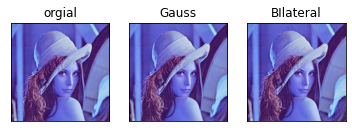

In [23]:
#smoothing an image 
img = cv.imread('opencv-logo.png')

#blur= cv.blur(img,(5,5)) #size of the kernel

gauss_blur = cv.GaussianBlur(img,(5,5),0) #3rd gaussian kerenl standard deviation sigm

median = cv.medianBlur(img,5) # size of the neighbourhood positive and odd 

img = cv.imread('lena.jpg')
gauss_blur = cv.GaussianBlur(img,(5,5),0)
bilateral = cv.bilateralFilter(img,9,75,75)
# 2nd = size of the neighbourhood 3rd = sd i.e sigma should be between 10 to 150

plt.subplot(131)
plt.imshow(img)
plt.title('orgial')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img)
plt.title('Gauss')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img)
plt.title('BIlateral')
plt.xticks([])
plt.yticks([])

plt.show()


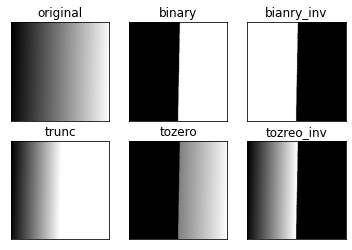

In [23]:
img = cv.imread('gradient.png',0)

#cv.imshow('original image',img)
#2nd thresh , 3rd max val , 4th type 
ret , thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret , thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret , thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret , thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret , thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['original','binary','bianry_inv','trunc','tozero','tozreo_inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray') # draws the image on plot
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


#cv.imshow("image thresh",thresh5)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [16]:
img = cv.imread('sudoku.png',0)
img = cv.medianBlur(img,5)
cv.imshow('original image',img)
ret , thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# causes loss of important data

thresh2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
# 5th block size of the pixel neighbourhood to calculate the threshold value 
# 6th c = constant value subtracted from the mean or the weighted mean

thresh3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
cv.imshow('thresh image',thresh3)
cv.waitKey(0)
cv.destroyAllWindows()

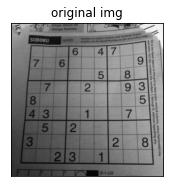

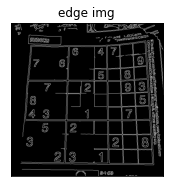

In [22]:
img = cv.imread('sudoku.png',0)
edges = cv.Canny(img,100,200)

plt.subplot(121)
plt.imshow(img,'gray')
plt.title('original img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.subplot(122)
plt.imshow(edges,'gray')
plt.title('edge img')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
vid = cv.VideoCapture('vtest.avi')

while(vid.isOpened()):
    
    #capture frame by frame 
    ret,frame = vid.read()
    frame = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    edges = cv.Canny(frame,100,200)
    # Display the resulting frame 
    cv.imshow('edges',edges)
    key = cv.waitKey(20)

    if key ==27:
        break

vid.release()
cv.destroyAllWindows()